#Segundo Parcial - Pregunta 1 - APRENDIZAJE NO SUPERVISADO
##Nombre: Jhamil Crespo Rejas
##Carrera: Ingenieria en Ciencias de la Computacion


##Importacion de Librerias

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os # modulo para interactuar con el sistema operativo (lextura y escritura de archivos)
import numpy as np #Cálculo científico y vectorial para python
import pandas as pd #para la manipulacion y analisis de datos
from sklearn.model_selection import train_test_split # para dividir conjuntos de datos en entrenamiento y prueba
from sklearn.preprocessing import OrdinalEncoder #para codificar variables categoricas como numeros enteros
import matplotlib.pyplot as plt #para la creacion de graficos y visualizaciones
from sklearn.cluster import KMeans #para realizar el clustering para el aprendizaje no supervisado
from sklearn.metrics import silhouette_score


##Preprocesamiento del Dataset

Este dataset contiene informacion recopilada so tronados que ocurrieron en los Estados de Estados Unidos desde 1950 hasta 2021.

La destructividad de un tornado se deriva en gran medida de la velocidad del viento dentro de él. Por esta razón, los meteorólogos califican los tornados utilizando una escala basada en la velocidad del viento. En los Estados Unidos, los tornados se clasificaron originalmente en la Escala Fujita, y desde febrero de 2007 en la Escala Fujita Mejorada. Las dos escalas cubren rangos de velocidad ligeramente diferentes, pero a efectos prácticos son los mismos. A continuación se muestra la escala Fujita mejorada.

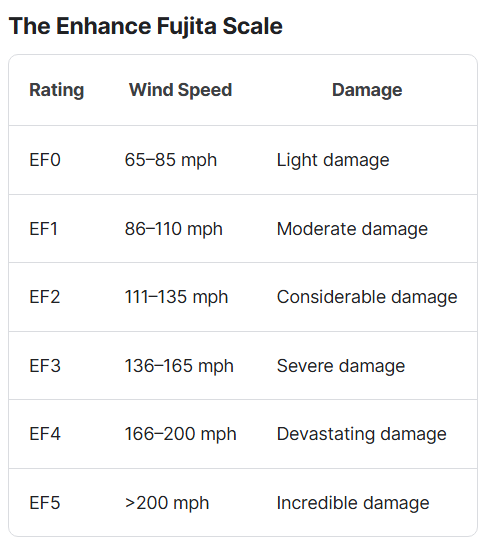

En base a esta informacion se puede estimar que tanto daño puede causar un tornado.

Cuando un tornado no se logro clasificar en esa esacala se denota por un valor de -9

####CARACTERISTCAS

* yr - Año
* mn - Mes (1-12)
* dy - Dia del Mes
* date - Fecha (Redundante - se debe eliminar)
* st - Estado en donde se origino el tornado
* mag - Calificación EF (-9 si se desconoce la calificación)
* inj - Número de heridos
* fat - Número de víctimas mortales
* slat - Latitud inicial en grados decimales
* slon - Longitud inicial en grados decimales
* elat - Latitud final en grados decimales (valor de 0 si falta)
* elon - Longitud final en grados decimales (valor de 0 si falta)
* len - Longitud de la vía en millas
* wid - Anchura en yardas

Link del dataset:
https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021


In [ ]:
#Lectura del dataset
url = "/content/gdrive/MyDrive/Segundo Parcial - IA/Pregunta1/us_tornado_dataset_1950_2021.csv"
dataframe = pd.read_csv(url)
print(dataframe)

         yr  mo  dy        date  st  mag  inj  fat     slat     slon     elat  \
0      1950   1   3  1950-01-03  IL    3    3    0  39.1000 -89.3000  39.1200   
1      1950   1   3  1950-01-03  MO    3    3    0  38.7700 -90.2200  38.8300   
2      1950   1   3  1950-01-03  OH    1    1    0  40.8800 -84.5800   0.0000   
3      1950   1  13  1950-01-13  AR    3    1    1  34.4000 -94.3700   0.0000   
4      1950   1  25  1950-01-25  IL    2    0    0  41.1700 -87.3300   0.0000   
...     ...  ..  ..         ...  ..  ...  ...  ...      ...      ...      ...   
67553  2021  12  30  2021-12-30  GA    1    0    0  31.1703 -83.3804  31.1805   
67554  2021  12  30  2021-12-30  GA    1    0    0  31.6900 -82.7300  31.7439   
67555  2021  12  31  2021-12-31  AL    1    0    0  34.2875 -85.7878  34.2998   
67556  2021  12  31  2021-12-31  GA    1    0    0  33.7372 -84.9998  33.7625   
67557  2021  12  31  2021-12-31  GA    1    6    0  33.5676 -83.9877  33.5842   

          elon    len  wid 

In [ ]:
st_unicos = dataframe['st'].unique() #Obtenemos todos los valores unicos de la columna 'st'

#Mostramos la lista de valores unicos y la cantidad de estos
print(st_unicos)
print(len(st_unicos))

['IL' 'MO' 'OH' 'AR' 'TX' 'LA' 'MS' 'TN' 'OK' 'FL' 'AL' 'SC' 'KS' 'IA'
 'NE' 'SD' 'WY' 'NC' 'GA' 'ND' 'MN' 'WI' 'IN' 'PA' 'NM' 'CT' 'CO' 'WV'
 'MD' 'KY' 'CA' 'VA' 'NJ' 'MI' 'MA' 'NH' 'OR' 'NY' 'MT' 'AZ' 'UT' 'ME'
 'VT' 'ID' 'WA' 'DE' 'HI' 'PR' 'AK' 'NV' 'RI' 'DC' 'VI']
53


In [ ]:
# Convertimos todos los valores categoricos en valores numericos
ordinal_encoder = OrdinalEncoder()

#asignamos valores numericos equivalentes
st_cat = dataframe[['st']]
dataframe['st_ordinal'] = ordinal_encoder.fit_transform(st_cat)


#Quitamos la columna 'st'
dataframe.drop('st', axis=1, inplace=True)

#verificamos
#print(dataframe.head())
print(dataframe['st_ordinal'])

0        14.0
1        24.0
2        35.0
3         2.0
4        14.0
         ... 
67553    10.0
67554    10.0
67555     1.0
67556    10.0
67557    10.0
Name: st_ordinal, Length: 67558, dtype: float64


In [ ]:
#Quitamos la columna 'date' ya que es redundante
dataframe.drop('date', axis=1, inplace=True)

In [ ]:
#dataframe = dataframe.loc[dataframe['mag'] != -9]#quitamos todas las filas que no tienen clasificado a los tornados

In [ ]:
#eliminamos las filas con valores nulos
dataframe.dropna(inplace=True)
print(dataframe.isnull().sum())

dataframe.describe()

yr            0
mo            0
dy            0
mag           0
inj           0
fat           0
slat          0
slon          0
elat          0
elon          0
len           0
wid           0
st_ordinal    0
dtype: int64


,yr,mo,dy,mag,inj,fat,slat,slon,elat,elon,len,wid,st_ordinal
count,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000
mean,1991.341618,5.976761,15.921016,0.691273,1.437876,0.090470,37.142412,-92.784618,22.730695,-56.245590,3.478340,106.577030,25.327082
std,19.330015,2.438192,8.736773,1.283375,18.263956,1.484106,5.093979,8.689103,18.588638,45.489157,8.278775,205.802676,14.434335
min,1950.000000,1.000000,1.000000,-9.000000,0.000000,0.000000,17.721200,-163.530000,0.000000,-163.530000,0.000000,0.000000,0.000000
25%,1976.000000,4.000000,8.000000,0.000000,0.000000,0.000000,33.220000,-98.450000,0.000000,-94.709800,0.100000,20.000000,14.000000
50%,1994.000000,6.000000,16.000000,1.000000,0.000000,0.000000,37.030000,-93.600000,32.480000,-84.420000,0.800000,50.000000,24.000000
75%,2008.000000,7.000000,24.000000,1.000000,0.000000,0.000000,40.930000,-86.730000,38.610000,0.000000,3.130000,100.000000,39.000000
max,2021.000000,12.000000,31.000000,5.000000,1740.000000,158.000000,61.020000,-64.715100,61.020000,0.000000,234.700000,4576.000000,52.000000


In [ ]:
# Verificar el resultado
print(dataframe)

         yr  mo  dy  mag  inj  fat     slat     slon     elat     elon    len  \
0      1950   1   3    3    3    0  39.1000 -89.3000  39.1200 -89.2300   3.60   
1      1950   1   3    3    3    0  38.7700 -90.2200  38.8300 -90.0300   9.50   
2      1950   1   3    1    1    0  40.8800 -84.5800   0.0000   0.0000   0.10   
3      1950   1  13    3    1    1  34.4000 -94.3700   0.0000   0.0000   0.60   
4      1950   1  25    2    0    0  41.1700 -87.3300   0.0000   0.0000   0.10   
...     ...  ..  ..  ...  ...  ...      ...      ...      ...      ...    ...   
67553  2021  12  30    1    0    0  31.1703 -83.3804  31.1805 -83.3453   2.19   
67554  2021  12  30    1    0    0  31.6900 -82.7300  31.7439 -82.5412  11.71   
67555  2021  12  31    1    0    0  34.2875 -85.7878  34.2998 -85.7805   0.95   
67556  2021  12  31    1    0    0  33.7372 -84.9998  33.7625 -84.9633   2.75   
67557  2021  12  31    1    6    0  33.5676 -83.9877  33.5842 -83.9498   2.50   

       wid  st_ordinal  
0 

Dividimos el dataframe en dos conjuntos, las caracteristicas y las etiquetas

In [ ]:
y = dataframe['mag']
X = dataframe.drop(columns=['mag'])

Observamos cuantas clase hay en Y

In [ ]:
labels = y.unique()

#Mostramos la lista de valores unicos y la cantidad de estos
print(labels)
print(len(labels))

[ 3  1  2  4  0  5 -9]
7


In [ ]:
# Dividimos los datos en conjuntos para entrenamiento y para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Observamos la cantidad de ejemplos que quedaron para entrenamiento y para prueba

In [ ]:
print(len(X_train))
#print(len(y_train))
print(len(X_test))
#print(len(y_test))

54046
13512


##Clustering

###Analisis para escoger la mejor cantidad de grupos para realizar el clustering

Creamos 9 modelos K-means con diferentes cantidades de clusters (1 - 9) para encontrar el numero de clusters adecuado.

Este analisis lo hacemos en base a el coeficiente de silueta de los modelos que es un indicativo de cuan bien agrupados estan los datos. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

Para el primer grafico utilizamos el coeficiente de silueta de todo el modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

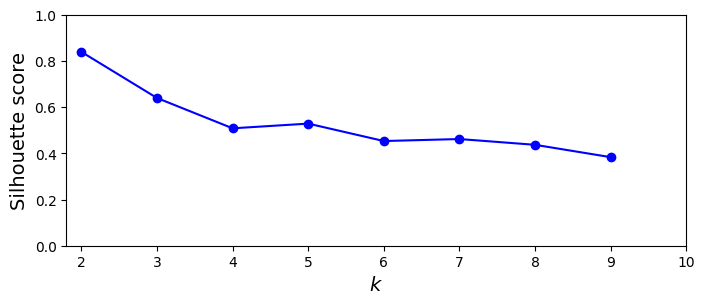

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, init="random", n_init=10, algorithm="full", random_state=11).fit(X_train)
                for k in range(1, 10)] #se crea una lista de modelos k-means, uno por cada numero de clusters (1-9)

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]] #se calculan los puntajes de silueta para todos los modelos

plt.figure(figsize=(8, 3)) #se crea una figura de 8x3 pulgadas
plt.plot(range(2, 10), silhouette_scores, "bo-") #se grafican los puntajes de silueta con puntos azules
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.0, 0.0, 1.0]) #se establece el rago para el eje x y el eje y
plt.show()

Para el segundo grafico utilizamos el coeficiente de silueta de cada cluster en los modelos, eso nos ayuda a ver que tan equilibrados y estables estan los agrupamientos en los clusters de los modelos.

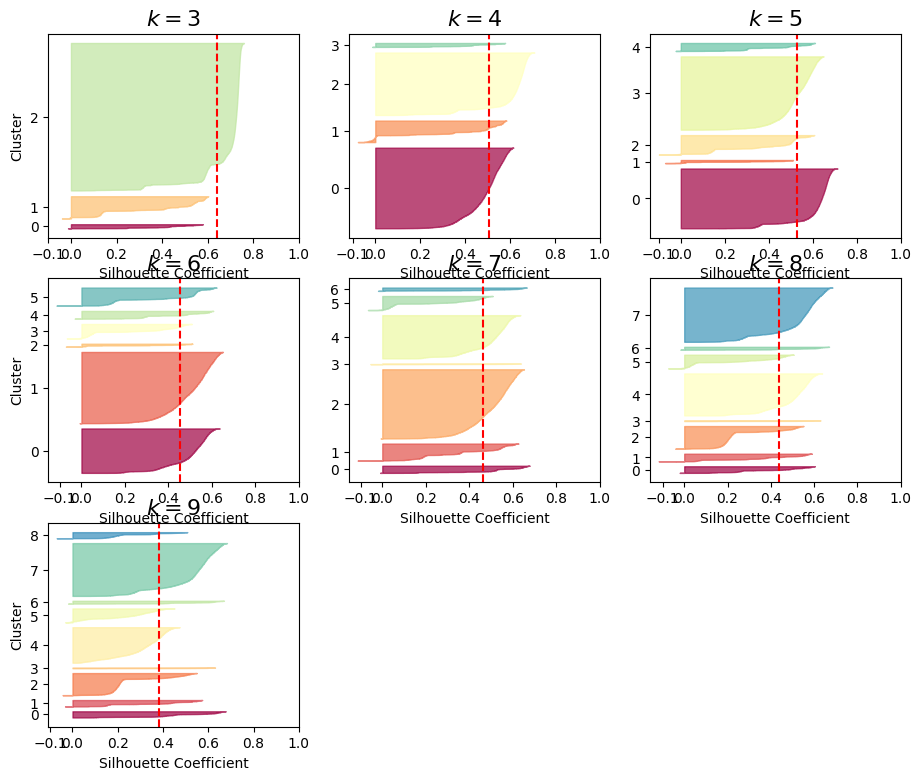

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))#crea una figura de 11x9 pulgadas

n_rows = 3  # número de filas en la cuadrícula de subgráficos
n_cols = 3  # número de columnas en la cuadrícula de subgráficos

for k in (3, 4, 5, 6, 7, 8, 9): #se itera por los valores de k (numero de clusters)
    index = k - 3  # calcula el índice correcto para el subgráfico
    plt.subplot(n_rows, n_cols, index + 1) #crea un subgrafico para cada uno

    y_pred = kmeans_per_k[k - 1].labels_#se obtienen las etiquetas
    silhouette_coefficients = silhouette_samples(X_train, y_pred)#se calculan los coeficientes de las siluetas para cada muestra

    padding = len(X_train) // 30 #se establece un espacio entre los graficos de silueta de cada cluster
    pos = padding
    ticks = [] #cada tick representara el centro de un cluster
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i] #se seleccionan los coeficientes correspondiente al cluster i
        coeffs.sort() #se ordenan los coeficientes

        color = mpl.cm.Spectral(i / k)#se asigna un color a cada cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)#se crea un grafico para los coeficientes
        ticks.append(pos + len(coeffs) // 2)#se adiciona la posicion del centro del area de silueta
        pos += len(coeffs) + padding #se actualiza la posicion para el siguiente cluster

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):
        plt.ylabel("Cluster")

    if k in (3,4,5,6,7, 8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")#se dibuja una linea con el valor medio del coeficiente de silueta
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Segun el analisis de las graficas, identificamos que el modelo con 6 clusters es el mas adecuado ya es que parece tener mas equilibrado los coeficientes de silueta de sus clusters.

##Aprendizaje Semi-Supervizado

Para el aprendizaje semi-supervizado primero creamos un modelo de K-means para 100 clusters y ajustamos los datos en base a esos grupos.

In [ ]:
from sklearn.cluster import KMeans

k = 100 #establece el numero de clusters (grupos)
kmeans = KMeans(n_clusters=k, random_state=42) #incializa el modelo
X_digits_dist = kmeans.fit_transform(X_train)#calcula las distancias de los datos a todos los centroides

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Una vez realizado el clustering, obtenemos los ejemplos mas representativos para cada uno de los clusters ademas de sus respectivas etiquetas verdaderas.

In [ ]:
idxs = np.argmin(X_digits_dist, axis=0)#calcula los indices de las distancias minimas para cada columna
X_representative_digits = X_train.values[idxs]#devuleve las muestras mas representativas por cada columna

In [ ]:
representative_labels = kmeans.predict(X_representative_digits)
print(representative_labels)#mostramos el numero de cluster correspondiente a cada ejemplo mas representativo

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Realizamos la clasificacion manual para esos ejemplos mas representativos

In [ ]:
y_representative_digits = y_train.values[idxs]#identifica los labels correspondientes a las muestras mas representativas
print(y_representative_digits)#esta serian nuestras etiquetas reales con las que etiquetaremos aquellos ejemplos mas representativos

[0 2 1 0 3 1 4 2 4 3 1 0 1 5 1 3 0 5 1 1 2 0 1 5 1 1 0 2 1 2 1 1 0 0 0 5 4
 3 2 0 3 3 3 2 1 2 2 4 0 2 4 1 5 1 2 0 1 1 2 3 3 0 3 0 1 0 1 4 4 4 2 0 1 0
 1 4 0 2 2 2 1 0 4 1 1 0 4 1 0 3 3 1 2 1 2 2 4 4 2 5]


Se realiza una prueba de entrenamiento de un modelo de regresion logistica con one vs all con los datos mas representativos y se hace una prueba de precision.

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea un modelo de regresion logistica con one vs all
%time log_reg2.fit(X_representative_digits, y_representative_digits)#entrena un modelo con los datos y labels representativos
log_reg2.score(X_test, y_test)#muestra la presicion del modelo

CPU times: user 682 ms, sys: 8.18 ms, total: 691 ms
Wall time: 722 ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.45167258732978094

Tambien se realiza un entrenamiento de otro modelo del mismo tipo del anterior pero directamente con las etiquetas reales del dataset.
Esto nos da una idea de mas o menos cuanto debe ser la presicion del modelo final

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea otro modelo de regresion logistica con one vs all
%time log_reg.fit(X_train, y_train)#entrena el modelo con los datos y labels correspondientes reales
log_reg.score(X_test, y_test)

CPU times: user 26.6 s, sys: 14.2 s, total: 40.8 s
Wall time: 30.4 s


0.5751184132622854

Segun las etiquetas mas representativas ya clasificadas manualmente hacemos una proparagacion en base a su etiqueta a todos los demas ejemplos de sus clusters.

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]#se asigna la etiqueta representativa a todas las muestras que pertenecen al cluster i

Luego entrenamos otro modelo con esas etiquetas propagadas y vemos su presicion

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea el tercer modelo de regresion logistica con one vs all
%time log_reg3.fit(X_train, y_train_propagated)#entrena el modelo con 1000 datos de entrenamiento y sus Y's correspondientes pero ya modifcadas en base a las y representativas
log_reg3.score(X_test, y_test)#calcula la presicion del modelo

CPU times: user 15.3 s, sys: 8.04 s, total: 23.3 s
Wall time: 14.8 s


0.5539520426287744

##Aprendizaje Activo

Identificamos las muestras con las que el modelo tiene más dificultades para clasificar correctamente

In [ ]:
probas = log_reg3.predict_proba(X_train)#se obtienen las probabilidades de que las muestras que pertenezcan a cada clase posible
labels_ixs = np.argmax(probas, axis=1)#obtiene el indice de la probabilidad maxima (la clase mas probable) por cada muestra
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])#se obtiene la probabilidad maxima de cada muestra
sorted_ixs = np.argsort(labels) #se ordenan los indices de las muestras por sus probabilidades en orden ascendente(las primeras seran las entradas con menores probabilidades maximas)
labels[sorted_ixs[:10]]#se muestran las 10 muestras con las menores probabilidades maximas

array([0.26656379, 0.26738366, 0.27291329, 0.28879708, 0.29177325,
       0.29836316, 0.29901443, 0.30027288, 0.30085524, 0.30252013])

In [ ]:
y_lowest = y_train.values[:][sorted_ixs[:k]] #obtiene las etiquetas de las k muestras con las menores probabilidades maximas de ser clasificadas correctamente
y_lowest

array([4, 3, 4, 4, 4, 1, 3, 4, 4, 4, 4, 4, 3, 4, 4, 1, 5, 1, 2, 1, 5, 1,
       3, 2, 3, 4, 3, 0, 2, 4, 3, 1, 1, 4, 2, 1, 3, 3, 2, 3, 3, 1, 2, 4,
       4, 5, 3, 0, 3, 3, 2, 4, 1, 0, 3, 4, 1, 3, 2, 1, 2, 3, 1, 4, 3, 1,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 0, 3, 3, 1, 4, 0, 2, 4,
       1, 1, 3, 2, 2, 3, 1, 4, 3, 2, 1, 3])

In [ ]:
y_train2 = y_train_propagated.copy()#copia las filas de las 'y' propagadas
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
#entrenamos el ultimo modelo con las Y que ya pasaron por todo el proceso de aprendizaje semi-supervizado y activo
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train, y_train2)
log_reg5.score(X_test, y_test)

CPU times: user 17.1 s, sys: 8.79 s, total: 25.9 s
Wall time: 16.1 s


0.5538040260509177